In [72]:
import pandas as pd
import janitor
from pathlib import Path
import missingno
from utils import read_csv_file, DontMissMe
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt


In [2]:
from typing import TYPE_CHECKING

class DataFrame(pd.DataFrame):
    missing: DontMissMe


In [3]:
%matplotlib inline

sns.set_theme(
    rc={
      "figure.figsize": (8, 6)
    }
)

sns.set_style("whitegrid")

In [4]:
train_path = Path("data", "train.csv")

In [5]:
train_df = read_csv_file(train_path)

File 'data\train.csv' loaded successfully. Shape: (347246, 28)


In [34]:
numeric_columns = ["AGE", "BMI"]
categorical_columns = list(set(train_df.columns) - set(numeric_columns) - set(["ID"]))
train_df[categorical_columns] = train_df[categorical_columns].astype("category")

In [ ]:
train_df.describe()

,AGE,BMI
count,347246.000000,310286.000000
mean,54.607679,2855.145811
std,17.557646,652.370720
min,18.000000,1200.000000
25%,40.000000,2414.000000
50%,57.000000,2744.000000
75%,69.000000,3175.000000
max,80.000000,9933.000000


In [38]:
train_df.describe(include="category")

,CHD_OR_MI,SEX,HEALTH,PHYSICAL_HEALTH,MENTAL_HEALTH,PHYSICAL_ACTIVITIES,BLOOD_PRESSURE,HIGH_CHOLESTEROL,SKIN_CANCER,CANCER,...,DIFFICULTY_WALKING,SMOKE,TABACCO_PRODUCTS,E_CIGARETTES,HEAVY_DRINKERS,HIV,FRUITS,VEGETABLES,FRIED_POTATOES,ETHNICITY
count,347246.0,347246,346408.0,339940.0,341212.0,346593.0,345939.0,297055.0,346379.0,346454.0,...,331642.0,327983.0,329213.0,328362.0,319663.0,306452.0,306992.0,299859.0,311944.0,347246
unique,2.0,2,2.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,3.0,4.0,2.0,2.0,2.0,2.0,3.0,6
top,1.0,2,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,...,2.0,2.0,3.0,3.0,1.0,2.0,1.0,1.0,1.0,1
freq,318988.0,185970,289523.0,228286.0,214722.0,262398.0,210318.0,178719.0,314042.0,312945.0,...,278844.0,195399.0,318762.0,246536.0,300696.0,203876.0,189180.0,244121.0,143488.0,263254


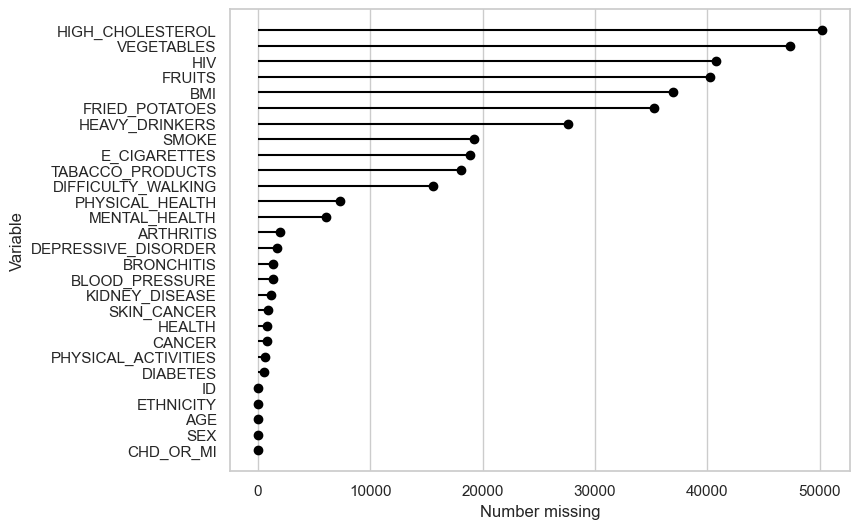

In [7]:
(
  train_df.missing.missing_variable_plot()
)

<Axes: >

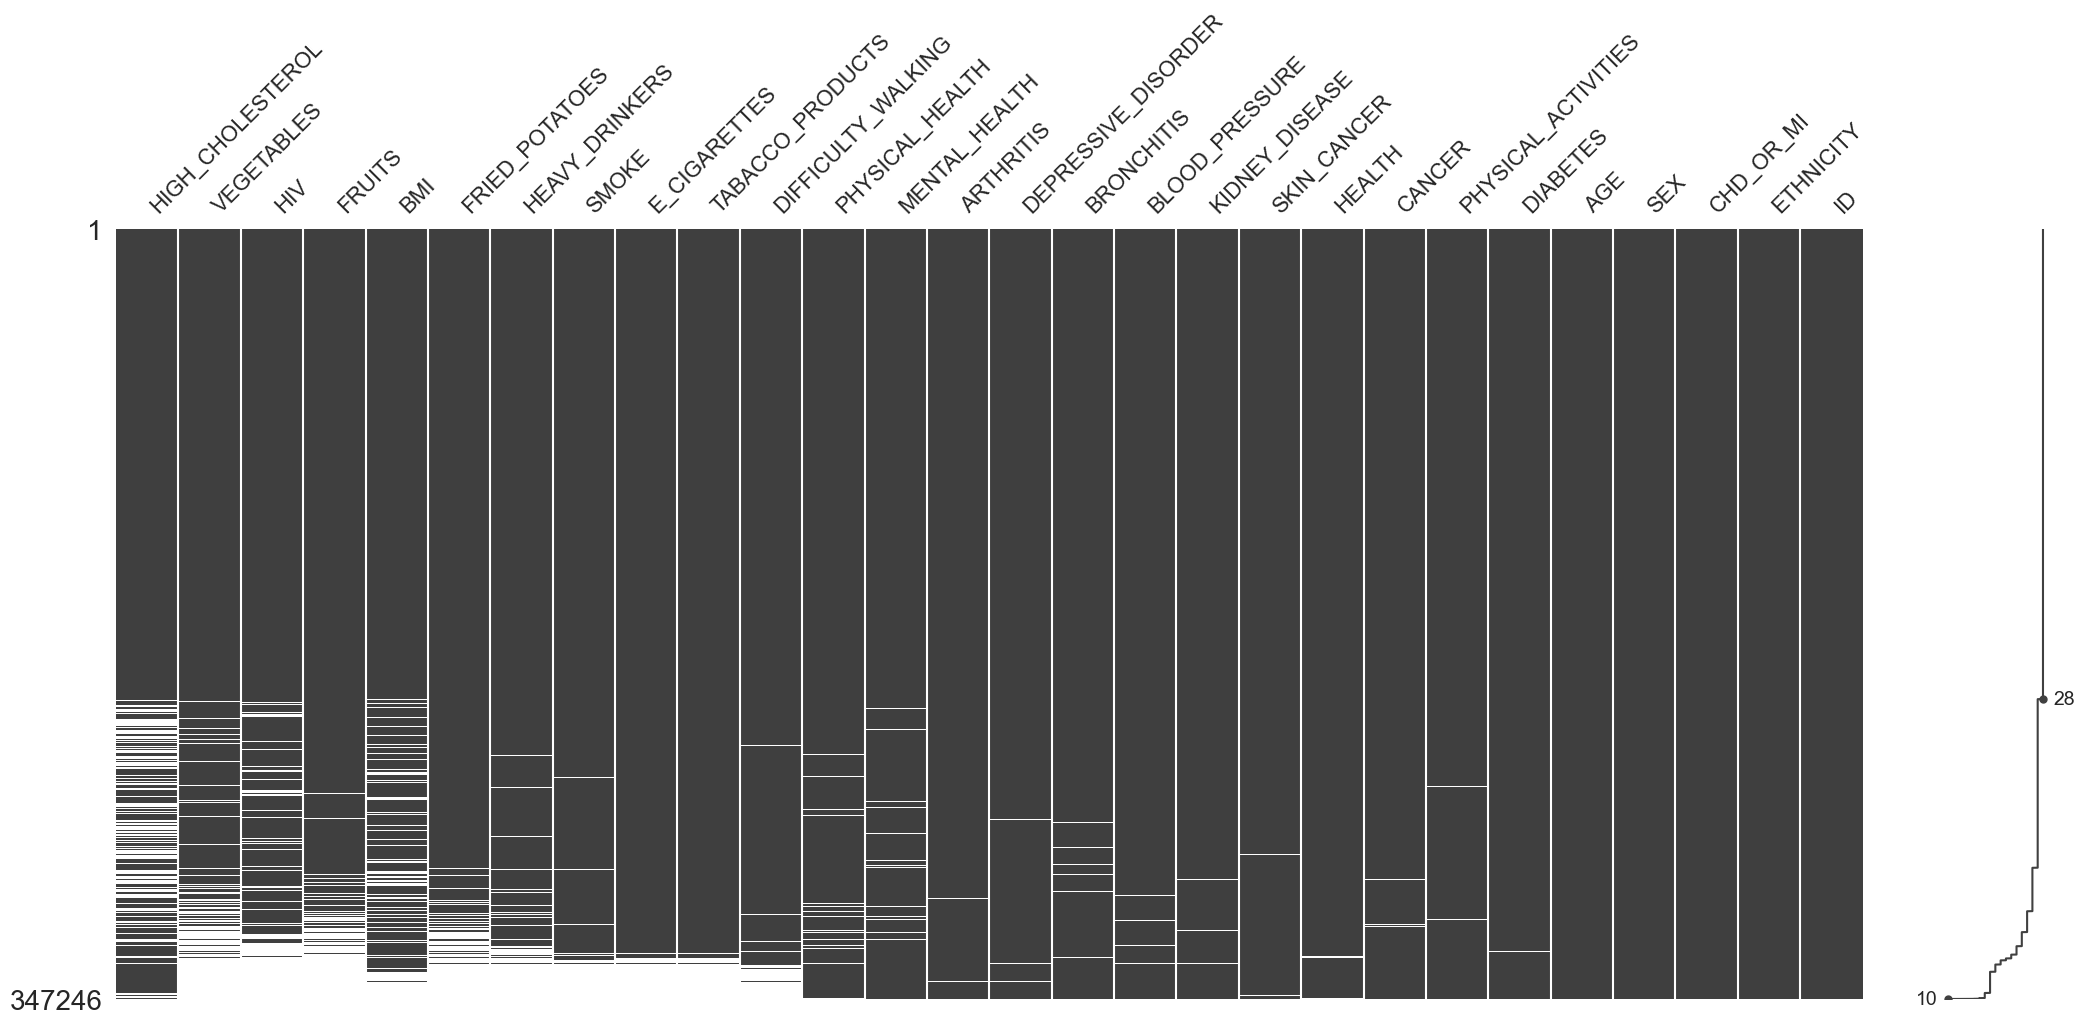

In [ ]:
(
  train_df
  .missing.sort_variables_by_missingness()
  .pipe(missingno.matrix, sort="descending")
)

In [11]:
high_missings_columns = ['HIGH_CHOLESTEROL', 'VEGETABLES', 'HIV', 'FRUITS', 'BMI',
    'FRIED_POTATOES', 'HEAVY_DRINKERS', 'SMOKE', 'E_CIGARETTES',
    'TABACCO_PRODUCTS', 'DIFFICULTY_WALKING']

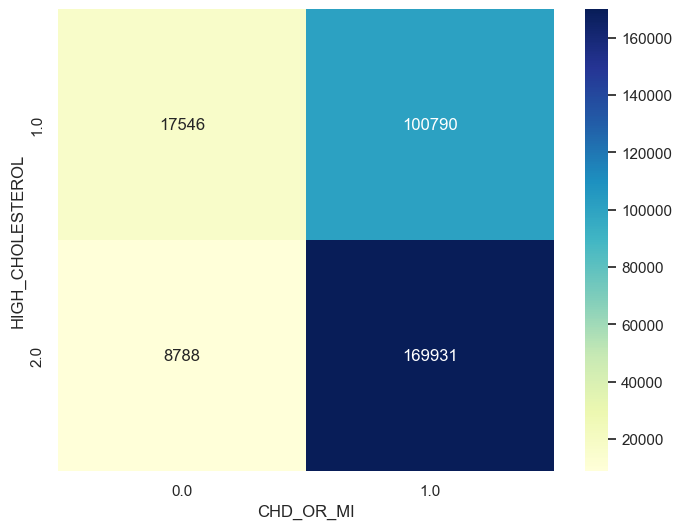

In [79]:
(
  train_df
  .select("AGE", "BMI", "CHD_OR_MI","HIGH_CHOLESTEROL")
  .pipe(
    lambda df: pd.crosstab(df['HIGH_CHOLESTEROL'], df['CHD_OR_MI'])
  )
  .pipe(
    lambda df: 
      sns.heatmap(df, annot=True, cmap="YlGnBu", fmt="d")

  )
);
